# Problem statement

IPL 2008-2020, let's not curb our cricket love and start analyzing the whole of IPL with this latest and complete Indian Premier League dataset.
It contains the match descriptions, results, winners, player of the matches, ball by ball dataset and much more.
So, stop thinking and start analyzing.

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplot inline

UsageError: Line magic function `%matplot` not found.


In [2]:
iplhead=pd.read_csv("C:/Users/friend/Downloads/IPL Matches 2008-2020.csv")

In [3]:
iplhead

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [4]:
iplhead.shape #the dataset contain 816 rows and 17 columns

(816, 17)

In [5]:
iplhead.columns
# this are the 17 columns in the dataset.

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [6]:
iplhead.describe() 
#dataset contain standard deviation of id is 3.059820e+05 ,standard deviation of neutral_venue is 0.292512
#standard deviation of result_margin is 22.068427

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [7]:
iplhead.dtypes
#dataset contain 14 object dtype ,2 integer dtype and one float dtype.  

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object

In [8]:
iplhead.info()
# the info() of the dataset contain float64(1), int64(2) and object(14).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [9]:
iplhead.size
#the dataset of size is 13872.

13872

In [10]:
iplhead.head(3)
#we got the first three rows of dataset for 1plhead.head(3).

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar


In [11]:
iplhead.tail(3)
#we got last three rows of the dataset for iplhead.tail(3).

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [12]:
iplhead.corr()
#the correlation of dataset for column id is 1.000000, -0.292042, -0.010501
#column neutral_venue is -0.292042, 1.000000, -0.006445
#column result margin is -0.010501, -0.006445, 1.000000.

,id,neutral_venue,result_margin
id,1.000000,-0.292042,-0.010501
neutral_venue,-0.292042,1.000000,-0.006445
result_margin,-0.010501,-0.006445,1.000000


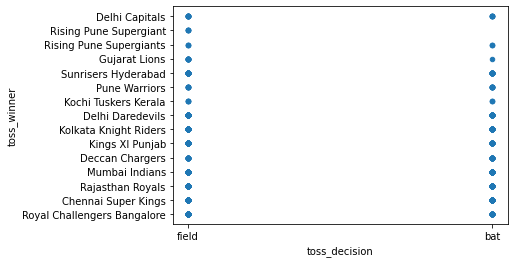

In [13]:
iplhead.plot(kind='scatter',x='toss_decision',y='toss_winner')
plt.show()
# the scatter plot defines that what the team wins the toss the choosen either field or bat in after the toss decision from ipl 2008-2020.

In [14]:
import warnings
warnings.filterwarnings("ignore")

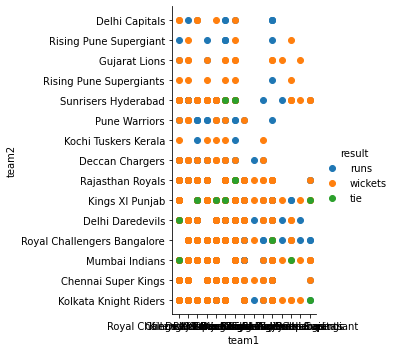

In [15]:
import seaborn as sns
data=sns.FacetGrid(data=iplhead, hue='result', size=5).map(plt.scatter, 'team1',
                                                      'team2').add_legend()
#the graph explian that results of runs ,wickets and tie between the team1 and team2 from ipl 2008-2020.
#blue dots indicates runs,orange dots indicates wickets and green dots indicates tie.


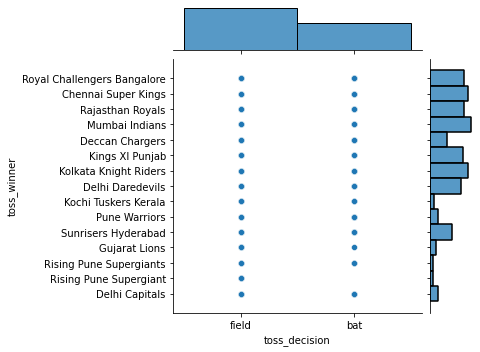

In [16]:
#Joint plot
sns.jointplot(x='toss_decision',y='toss_winner',data=iplhead, size=5);
#the jointplot explains that toss winners and toss decision.
#its shown that maximun of the toss winners are choosen field more then bat.
#the graph shown that the toss winning levels of each teams from ipl 2008-2020.  

[Text(0, 0, 'Kolkata Knight Riders'),
 Text(1, 0, 'Chennai Super Kings'),
 Text(2, 0, 'Delhi Daredevils'),
 Text(3, 0, 'Royal Challengers Bangalore'),
 Text(4, 0, 'Rajasthan Royals'),
 Text(5, 0, 'Kings XI Punjab'),
 Text(6, 0, 'Deccan Chargers'),
 Text(7, 0, 'Mumbai Indians'),
 Text(8, 0, 'Pune Warriors'),
 Text(9, 0, 'Kochi Tuskers Kerala'),
 Text(10, 0, 'Sunrisers Hyderabad'),
 Text(11, 0, 'Rising Pune Supergiants'),
 Text(12, 0, 'Gujarat Lions'),
 Text(13, 0, 'Rising Pune Supergiant'),
 Text(14, 0, 'Delhi Capitals')]

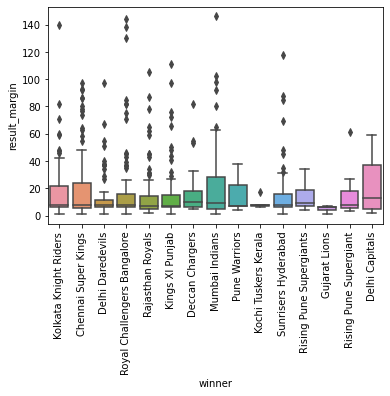

In [17]:
#boxplot used to detect outliers and relate categorical variables with a continous
data=sns.boxplot(x='winner', y='result_margin',data=iplhead)

data.set_xticklabels(data.get_xticklabels(), rotation=90)
#the boxplot shown result margin of match winning each teams from ipl 2008-2020.

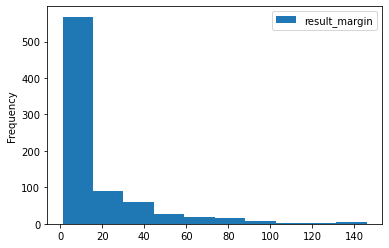

In [18]:
#histogram
iplhead.plot(kind='hist', x='winner', y='result_margin')
plt.show()

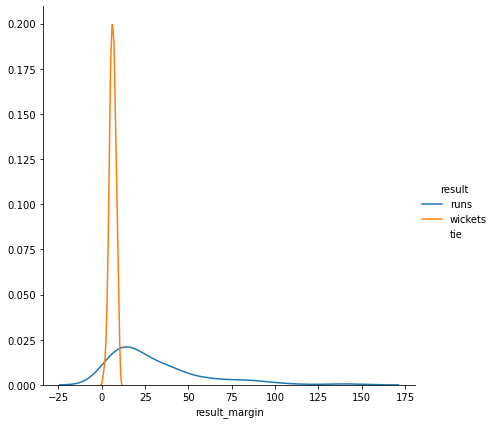

In [20]:
#kdplot density of the underlying features
sns.FacetGrid(iplhead, hue='result',size=6).map(sns.kdeplot,'result_margin').add_legend()
plt.show()

*observation

the kdplot shown that result margin of runs, wickets and tie from ipl 2008-2020.

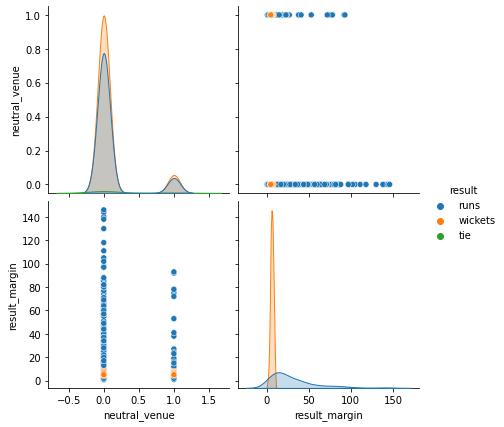

In [20]:
#pair plot -bivariate relation between each pair of features
sns.pairplot(iplhead.drop("id", axis=1), hue="result", size=3)
plt.show()

*observation

the pair plot showns that result between result margin and neutral venue from ipl 2008-2020.

In [21]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,6)

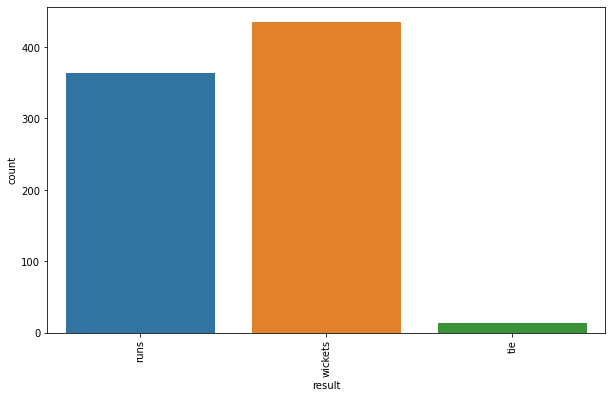

In [22]:
data=sns.countplot(iplhead['result'])
data.set_xticklabels(data.get_xticklabels(), rotation=90);

*observation

the countplot shows that reults of each count 0f matchs from ipl 2008-2020 runs, wickets and tie.

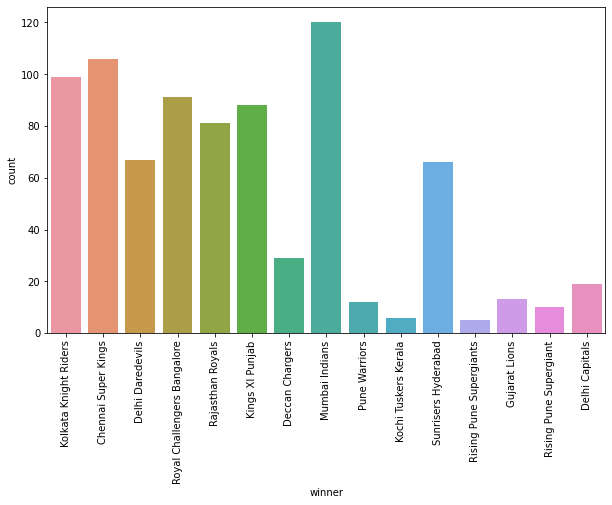

In [23]:
data=sns.countplot(iplhead['winner'])
data.set_xticklabels(data.get_xticklabels(), rotation=90);

*observation

the countplot shows that each and every team of winning count from ipl 2008-2020.
in this case highest numbers of wins by mumbai indians.

<AxesSubplot:xlabel='result_margin', ylabel='method'>

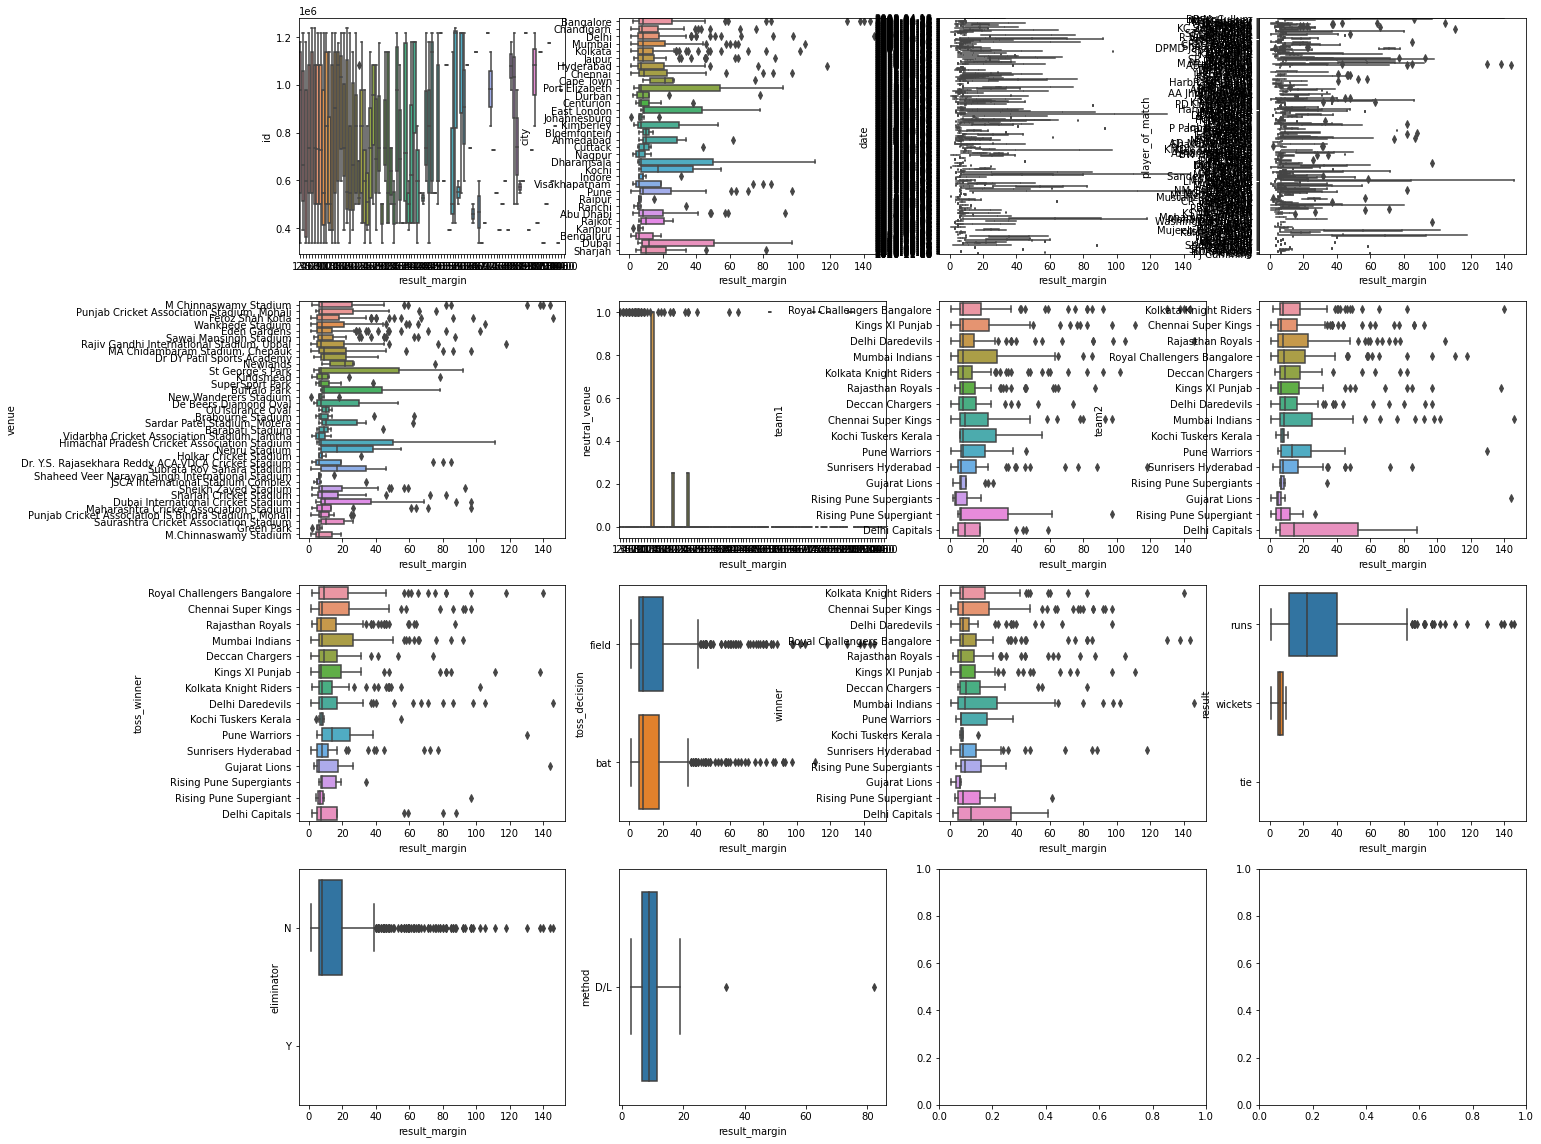

In [24]:
fig,ax = plt.subplots(4,4,figsize=(22,20))
#'ax'has references to all the four axes
sns.boxplot(iplhead['result_margin'], iplhead['id'],ax = ax[0,0])
#plot on 1st axes
sns.boxplot(iplhead['result_margin'],iplhead['city'],ax = ax[0,1])
#plot on 2nd axes
sns.boxplot(iplhead['result_margin'],iplhead['date'],ax = ax[0,2])
sns.boxplot(iplhead['result_margin'],iplhead['player_of_match'],ax = ax[0,3])
sns.boxplot(iplhead['result_margin'],iplhead['venue'],ax = ax[1,0])
sns.boxplot(iplhead['result_margin'],iplhead['neutral_venue'],ax = ax[1,1])
sns.boxplot(iplhead['result_margin'],iplhead['team1'],ax = ax[1,2])
sns.boxplot(iplhead['result_margin'],iplhead['team2'],ax = ax[1,3])
sns.boxplot(iplhead['result_margin'],iplhead['toss_winner'],ax = ax[2,0])
sns.boxplot(iplhead['result_margin'],iplhead['toss_decision'],ax = ax[2,1])
sns.boxplot(iplhead['result_margin'],iplhead['winner'],ax = ax[2,2])
sns.boxplot(iplhead['result_margin'],iplhead['result'],ax = ax[2,3])
sns.boxplot(iplhead['result_margin'],iplhead['eliminator'],ax = ax[3,0])
sns.boxplot(iplhead['result_margin'],iplhead['method'],ax = ax[3,1])


# Exploratory Data Analysis

<Figure size 1296x1152 with 0 Axes>

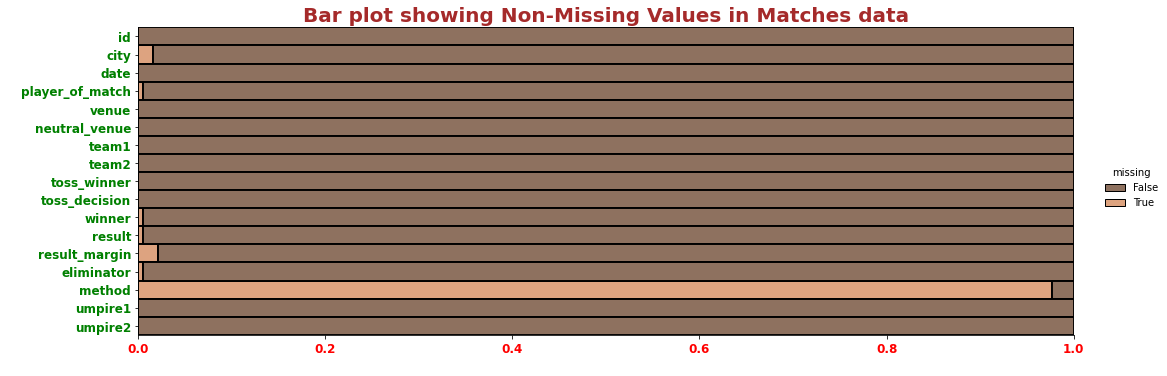

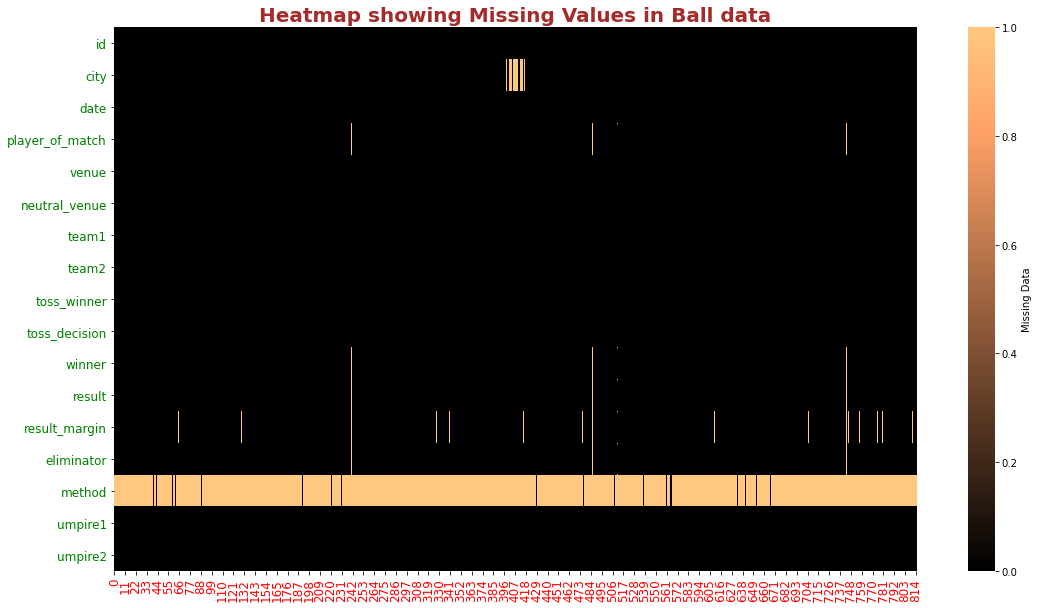

In [25]:
plt.figure(figsize=(18,16))
sns.displot(
    data=iplhead.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=3,
    palette='copper' 
)
plt.title('Bar plot showing Non-Missing Values in Matches data', weight = 'bold', size = 20, color = 'brown')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(size = 12, weight = 'bold', color = 'red')
plt.yticks(size = 12, weight = 'bold', color = 'green');

plt.figure(figsize=(18,10))
sns.heatmap(iplhead.isna().transpose(),
            cmap="copper",
            cbar_kws={'label': 'Missing Data'})
plt.title('Heatmap showing Missing Values in Ball data', weight = 'bold', size = 20, color = 'brown')
plt.xticks(size = 12, color = 'red')
plt.yticks(size = 12, color = 'green')
plt.show();

*observation

Almost all of the data is missing in the 'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type' columns. this could be due to information getting lost or not being recorded properly.


<AxesSubplot:>

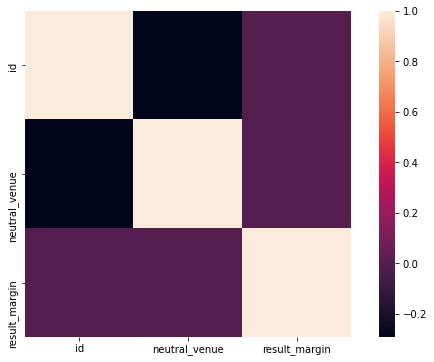

In [26]:
sns.heatmap(iplhead.corr(), square=True)

*observation

There isnt much correlation between these factors which makes sense.

In [27]:
toss = iplhead.toss_winner == iplhead.winner
toss.value_counts()

True     418
False    398
dtype: int64

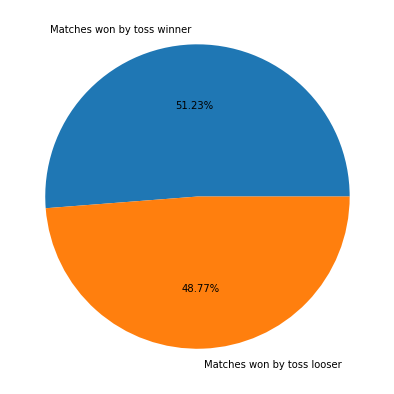

In [28]:
toss_data = { "Matches won by toss winner" : 418,
              "Matches won by toss looser" : 398}
toss_data = pd.Series(toss_data)
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(7,7))
plt.pie(x=toss_data,autopct="%.2f%%",labels=toss_data.index);

*obesrvation

the piechart shows that matches won by the toss winners and matches won by the toss loosers. 

# matches won by the team

Text(0.5, 1.0, 'Matches won by the Teams')

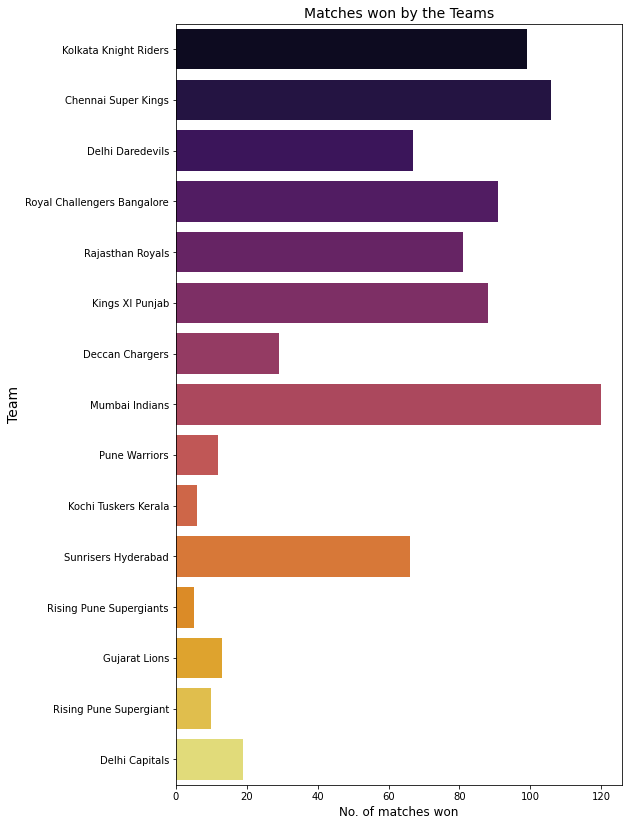

In [29]:
plt.figure(figsize=(8,14))
sns.countplot(y='winner',data=iplhead, palette='inferno')
plt.xlabel('No. of matches won',fontsize=12)
plt.ylabel('Team',fontsize=14)
plt.title('Matches won by the Teams',fontsize=14)

*observation 

the graph shows that overall matching winning teams from 2008-2020.

# matches played in citys

Text(0.5, 1.0, 'Matches per season')

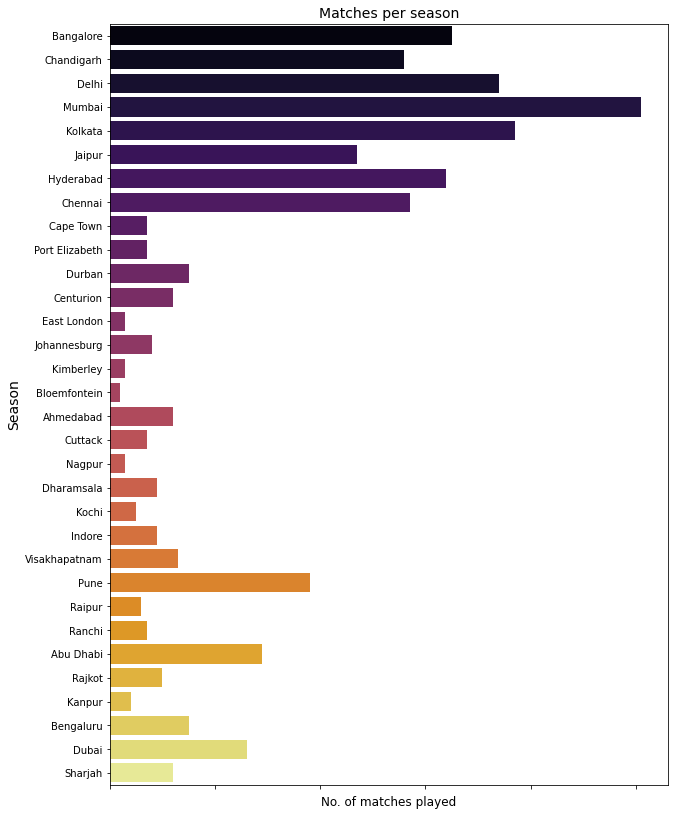

In [30]:
plt.figure(figsize=(10,14))
data=sns.countplot(y='city',data=iplhead, palette='inferno')
data.set_xticklabels(data.get_xticklabels(), rotation=90);
plt.xlabel('No. of matches played',fontsize=12)
plt.ylabel('Season',fontsize=14)
plt.title('Matches per season',fontsize=14)


*observation

the graph  represent the number of cities played by ipl 2008-2020
the most number of matches played in mumbai.

# missing values

In [31]:
iplhead.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [32]:
iplhead[iplhead['method'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [33]:
iplhead = iplhead.fillna({
    'method':'no',
    'city':'no',
    'player_of_match':'no',
    'result_margin':0,
    'eliminator':'no'
})
iplhead

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,no,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,no,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,no,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,no,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,no,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,0.0,Y,no,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,no,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,no,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,no,PR Reiffel,S Ravi


In [34]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [35]:
y_predicted = km.fit_predict(iplhead[['id','result_margin']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
iplhead['cluster']=y_predicted
iplhead.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,cluster
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,no,Asad Rauf,RE Koertzen,0
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,no,MR Benson,SL Shastri,0
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,no,Aleem Dar,GA Pratapkumar,0
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,no,SJ Davis,DJ Harper,0
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,no,BF Bowden,K Hariharan,0


In [37]:
km.cluster_centers_

array([[4.76409601e+05, 1.77587940e+01],
       [1.11929020e+06, 1.64046823e+01],
       [7.80692815e+05, 1.56890756e+01]])

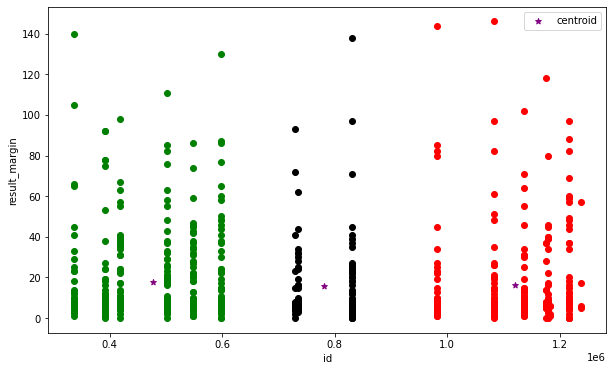

In [38]:
iplhead1 = iplhead[iplhead.cluster==0] #make 3 data frame and each blongs to different cluster
iplhead2 = iplhead[iplhead.cluster==1]
iplhead3 = iplhead[iplhead.cluster==2]
plt.scatter(iplhead1.id,iplhead1['result_margin'],color='green')
plt.scatter(iplhead2.id,iplhead2['result_margin'],color='red')
plt.scatter(iplhead3.id,iplhead3['result_margin'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('id')
plt.ylabel('result_margin')
plt.legend()

In [39]:
scaler = MinMaxScaler()

scaler.fit(iplhead[['result_margin']])
iplhead['result_margin'] = scaler.transform(iplhead[['result_margin']])

scaler.fit(iplhead[['id']])
iplhead['id'] = scaler.transform(iplhead[['id']])

In [40]:
iplhead.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,cluster
0,0.000000,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,0.958904,N,no,Asad Rauf,RE Koertzen,0
1,0.000001,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,0.226027,N,no,MR Benson,SL Shastri,0
2,0.000002,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,0.061644,N,no,Aleem Dar,GA Pratapkumar,0
3,0.000003,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,0.034247,N,no,SJ Davis,DJ Harper,0
4,0.000004,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,0.034247,N,no,BF Bowden,K Hariharan,0


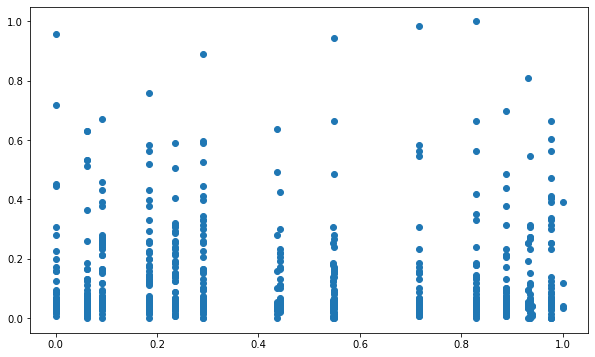

In [41]:
plt.scatter(iplhead.id,iplhead['result_margin'])

In [42]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iplhead[['id','result_margin']])
    sse.append(km.inertia_)

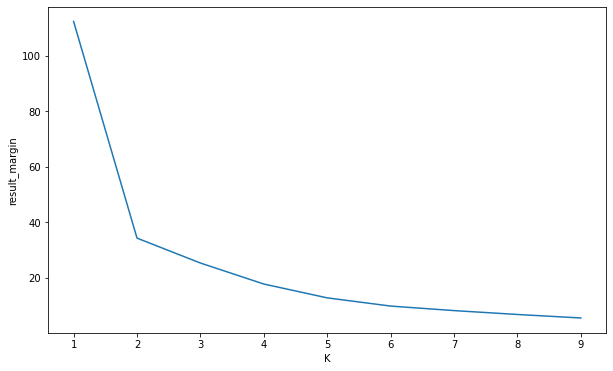

In [43]:
plt.xlabel('K')
plt.ylabel('result_margin')
plt.plot(k_rng,sse)